    Homework 08: Artificial Neural Network(ANN)
    AMRUTHA KANAKATTE RAVISHANKAR
    CWID :20027346


In [1]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("wisc_bc_ContinuousVar.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Preprocess the data
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [4]:
# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [7]:
# Build the ANN model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model and save the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.4277 - loss: 0.8180
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6094 - loss: 0.6592
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.7290 - loss: 0.5349
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7863 - loss: 0.4841
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8335 - loss: 0.4328
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8523 - loss: 0.3907
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.8986 - loss: 0.3717
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9207 - loss: 0.3284
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9104 - loss: 0.3157
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9430 - loss: 0.2707
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.9471 - loss: 0.2668
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9815 - loss: 0.0891  
Test Accuracy: 0.9825


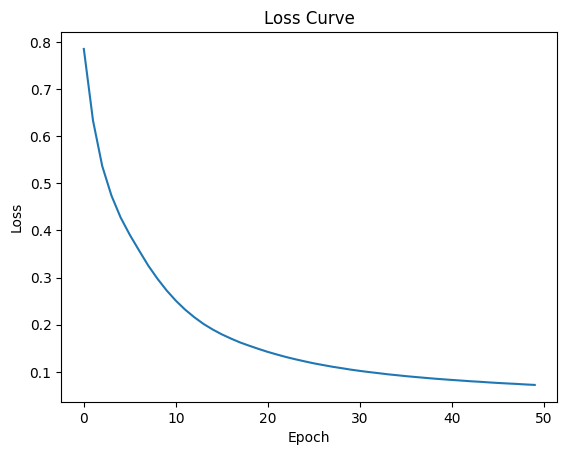

In [11]:
#Loss curve
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()